In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-order-data-for-a-month/Data.csv


In [3]:
data = pd.read_csv('/kaggle/input/restaurant-order-data-for-a-month/Data.csv')
data.head()

,Order_ID,TAKEAWAY/SEATING/PICKUP,DATE,DAY,TIME,SERVER,ITEM,QUANTITY,PRICE,TOTAL,ALLERGIES,FOOD TYPE,WEEK NUMBER
0,139017,SEAT,19-06-2020,FRIDAY,4:02 PM,JILLIAN N.,FISH & CHIPS 2 PIECE,1,22,22,NO,ENTRÉE,WEEK 1
1,138938,SEAT,19-06-2020,FRIDAY,11:29 AM,ASHLEY C.,FAST FARE BREAKFAST,1,10,10,NO,BREAKFAST,WEEK 1
2,138938,SEAT,19-06-2020,FRIDAY,11:29 AM,ASHLEY C.,CHIC COBB SALAD SMALL,1,14,14,NO,SALAD,WEEK 1
3,138938,SEAT,19-06-2020,FRIDAY,11:29 AM,ASHLEY C.,THAI PRAWN SALAD LARGE,1,18,18,NO,SALAD,WEEK 1
4,138908,TAKEAWAY,19-06-2020,FRIDAY,9:46 AM,ASHLEY C.,FAST FARE BREAKFAST,1,10,10,NO,BREAKFAST,WEEK 1


In [78]:
data.tail()

,Order_ID,TAKEAWAY/SEATING/PICKUP,DATE,DAY,TIME,SERVER,ITEM,QUANTITY,PRICE,TOTAL,ALLERGIES,FOOD TYPE,WEEK NUMBER
1536,146238,SEAT,22-07-2020,WEDNESDAY,12:49 PM,JILLIAN N.,CHICKEN GYOZA,1,14,14,NO,STARTERS,WEEK 5
1537,146238,SEAT,22-07-2020,WEDNESDAY,12:49 PM,JILLIAN N.,SALT & PEPPER PORK RIBS,1,14,14,NO,STARTERS,WEEK 5
1538,146254,TAKEAWAY,22-07-2020,WEDNESDAY,1:19 PM,DEB D.,CHICKEN WINGS,2,14,28,NO,STARTERS,WEEK 5
1539,146254,TAKEAWAY,22-07-2020,WEDNESDAY,1:19 PM,DEB D.,CHICKEN GYOZA,1,14,14,NO,STARTERS,WEEK 5
1540,146253,SEAT,22-07-2020,WEDNESDAY,2:18 PM,JILLIAN N.,NACHOS LARGE,1,20,20,NO,STARTERS,WEEK 5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Order_ID                 1541 non-null   int64 
 1   TAKEAWAY/SEATING/PICKUP  1541 non-null   object
 2   DATE                     1541 non-null   object
 3   DAY                      1541 non-null   object
 4   TIME                     1541 non-null   object
 5   SERVER                   1541 non-null   object
 6   ITEM                     1541 non-null   object
 7   QUANTITY                 1541 non-null   int64 
 8   PRICE                    1541 non-null   int64 
 9   TOTAL                    1541 non-null   int64 
 10  ALLERGIES                1541 non-null   object
 11  FOOD TYPE                1540 non-null   object
 12  WEEK NUMBER              1541 non-null   object
dtypes: int64(4), object(9)
memory usage: 156.6+ KB


In [5]:
data.isna().sum()

Order_ID                   0
TAKEAWAY/SEATING/PICKUP    0
DATE                       0
DAY                        0
TIME                       0
SERVER                     0
ITEM                       0
QUANTITY                   0
PRICE                      0
TOTAL                      0
ALLERGIES                  0
FOOD TYPE                  1
WEEK NUMBER                0
dtype: int64

In [6]:
data.dropna(inplace= True)
data.isna().sum()

Order_ID                   0
TAKEAWAY/SEATING/PICKUP    0
DATE                       0
DAY                        0
TIME                       0
SERVER                     0
ITEM                       0
QUANTITY                   0
PRICE                      0
TOTAL                      0
ALLERGIES                  0
FOOD TYPE                  0
WEEK NUMBER                0
dtype: int64

In [7]:
data.columns

Index(['Order_ID', 'TAKEAWAY/SEATING/PICKUP', 'DATE', 'DAY', 'TIME', 'SERVER',
       'ITEM', 'QUANTITY', 'PRICE', 'TOTAL', 'ALLERGIES', 'FOOD TYPE',
       'WEEK NUMBER'],
      dtype='object')

In [10]:
cols = ['TAKEAWAY/SEATING/PICKUP', 'SERVER','ITEM', 'QUANTITY', 'ALLERGIES', 'FOOD TYPE']
# check for the columns which has below 5 classes 
for column in cols:
    if len(data[column].unique()) <= 12:
        print("{}: {}".format(column ,data[column].unique()))

TAKEAWAY/SEATING/PICKUP: ['SEAT' 'TAKEAWAY' 'PICKUP' 'TAKEWAY']
QUANTITY: [1 2 3 4]
ALLERGIES: ['NO' 'YES']
FOOD TYPE: ['ENTRÉE' 'BREAKFAST' 'SALAD' 'STARTERS' 'PIZZA' 'RICE BOWLS AND PASTA'
 'SANDWHICHES' 'SOUP' 'SIDE / ADD ON' 'JUNIOR MENU' 'SPECIALS' 'DESSERTS']


In [11]:
data['SERVER'].nunique()

16

In [12]:
data['ITEM'].nunique()

105

### Data Analysis

In [13]:
data.columns

Index(['Order_ID', 'TAKEAWAY/SEATING/PICKUP', 'DATE', 'DAY', 'TIME', 'SERVER',
       'ITEM', 'QUANTITY', 'PRICE', 'TOTAL', 'ALLERGIES', 'FOOD TYPE',
       'WEEK NUMBER'],
      dtype='object')

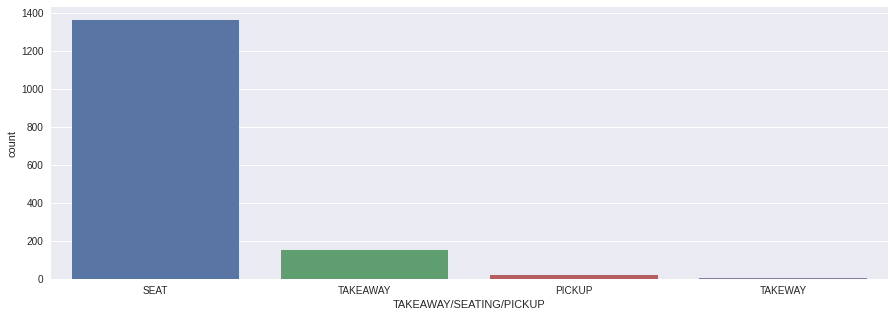

In [23]:
# which arrangement is benifit
plt.figure(figsize= (15,5))
plt.style.use('seaborn')
sns.countplot(x = 'TAKEAWAY/SEATING/PICKUP', data = data)
plt.show()

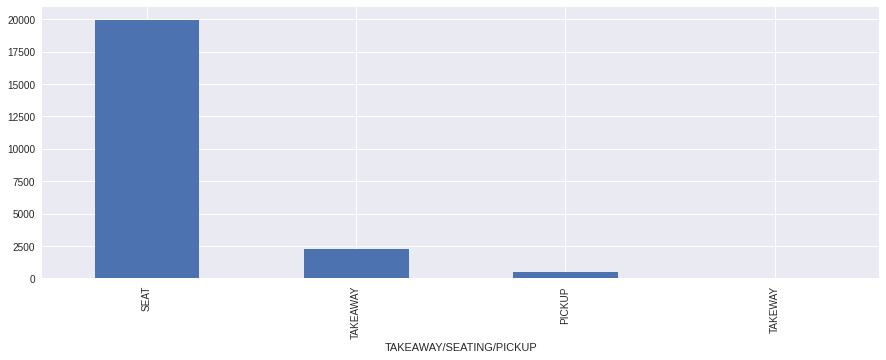

In [27]:
data.groupby(['TAKEAWAY/SEATING/PICKUP'])['TOTAL'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize = (15,5))
plt.show()

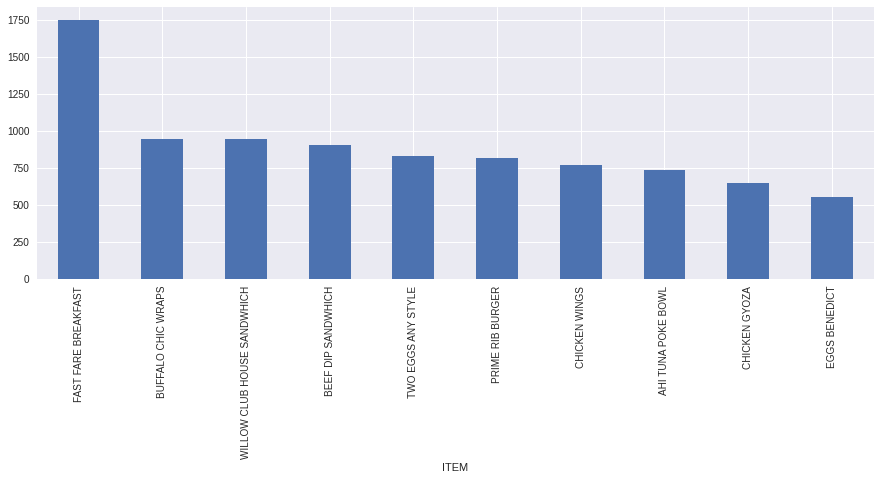

In [38]:
# Profitable revenue by Item (top 10)
data.groupby(['ITEM'])['TOTAL'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar', figsize = (15,5))
plt.show()

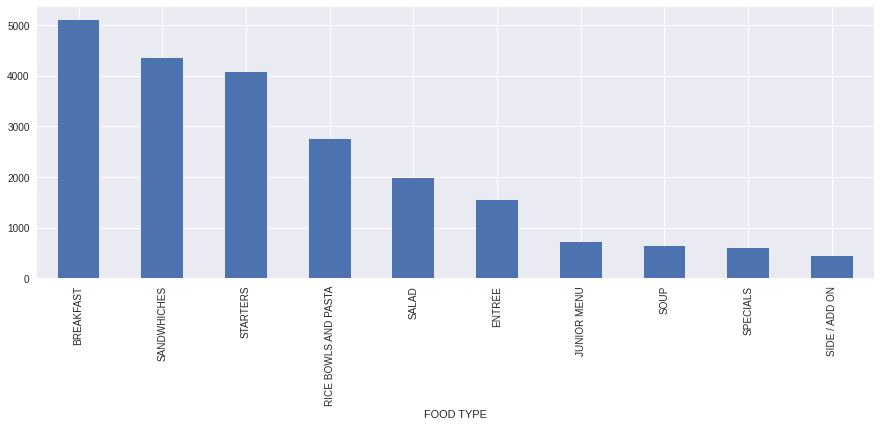

In [40]:
# Profitable revenue by Foodtype (top 10)
data.groupby(['FOOD TYPE'])['TOTAL'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar', figsize = (15,5))
plt.show()

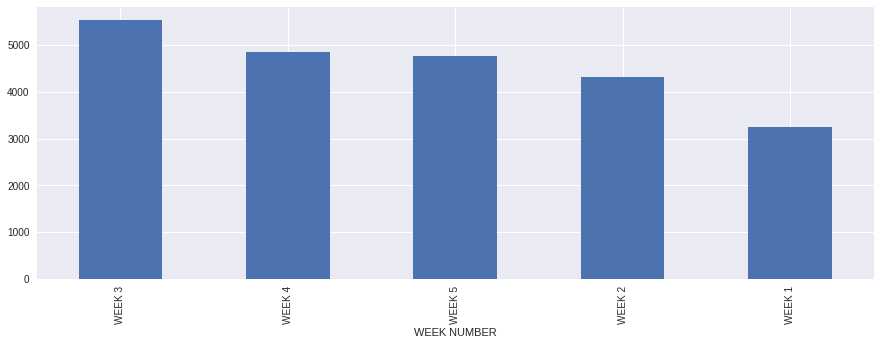

In [42]:
# profitable week
data.groupby(['WEEK NUMBER'])['TOTAL'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize = (15,5))
plt.show()

In [51]:
# from above bar graph we know week-3 has most profitable so, find which date and day
data[data['WEEK NUMBER'] == 'WEEK 3'].groupby(['WEEK NUMBER','DATE', 'DAY'])['TOTAL'].sum().sort_values(ascending = False)

WEEK NUMBER  DATE        DAY      
WEEK 3       07-07-2020  TUESDAY      1832
             03-07-2020  FRIDAY       1168
             06-07-2020  MONDAY        744
             04-07-2020  SATURDAY      697
             05-07-2020  SUNDAY        688
             08-07-2020  WEDNESDAY     412
Name: TOTAL, dtype: int64

In [52]:
data[data['WEEK NUMBER'] == 'WEEK 3'].groupby(['WEEK NUMBER','DATE', 'DAY', 'TAKEAWAY/SEATING/PICKUP'])['TOTAL'].sum().sort_values(ascending = False)

WEEK NUMBER  DATE        DAY        TAKEAWAY/SEATING/PICKUP
WEEK 3       07-07-2020  TUESDAY    SEAT                       1684
             03-07-2020  FRIDAY     SEAT                       1035
             06-07-2020  MONDAY     SEAT                        715
             04-07-2020  SATURDAY   SEAT                        669
             05-07-2020  SUNDAY     SEAT                        631
             08-07-2020  WEDNESDAY  SEAT                        390
             07-07-2020  TUESDAY    TAKEAWAY                    133
             03-07-2020  FRIDAY     TAKEAWAY                    133
             05-07-2020  SUNDAY     TAKEAWAY                     57
             06-07-2020  MONDAY     TAKEAWAY                     29
             04-07-2020  SATURDAY   TAKEAWAY                     28
             08-07-2020  WEDNESDAY  TAKEAWAY                     22
             07-07-2020  TUESDAY    PICKUP                       15
Name: TOTAL, dtype: int64

In [55]:
# profitable day in week 3
data[data['WEEK NUMBER'] == 'WEEK 3'].groupby(['WEEK NUMBER','DAY'])['TOTAL'].sum().sort_values(ascending = False)

WEEK NUMBER  DAY      
WEEK 3       TUESDAY      1832
             FRIDAY       1168
             MONDAY        744
             SATURDAY      697
             SUNDAY        688
             WEDNESDAY     412
Name: TOTAL, dtype: int64

In [66]:
weeks = ['WEEK 1', 'WEEK 2','WEEK 3','WEEK 4','WEEK 5']
for week in weeks:
    print(data[data['WEEK NUMBER'] == week].groupby(['WEEK NUMBER', 'DAY'])['TOTAL'].sum().sort_values(ascending = False))

WEEK NUMBER  DAY      
WEEK 1       THURSDAY     843
             SUNDAY       700
             SATURDAY     677
             WEDNESDAY    537
             FRIDAY       493
Name: TOTAL, dtype: int64
WEEK NUMBER  DAY      
WEEK 2       THURSDAY     1135
             FRIDAY        998
             SATURDAY      860
             WEDNESDAY     561
             SUNDAY        453
             MONDAY        306
Name: TOTAL, dtype: int64
WEEK NUMBER  DAY      
WEEK 3       TUESDAY      1832
             FRIDAY       1168
             MONDAY        744
             SATURDAY      697
             SUNDAY        688
             WEDNESDAY     412
Name: TOTAL, dtype: int64
WEEK NUMBER  DAY      
WEEK 4       FRIDAY       1231
             TUESDAY       951
             WEDNESDAY     910
             SATURDAY      718
             SUNDAY        531
             MONDAY        509
Name: TOTAL, dtype: int64
WEEK NUMBER  DAY      
WEEK 5       TUESDAY      1152
             FRIDAY        841
           

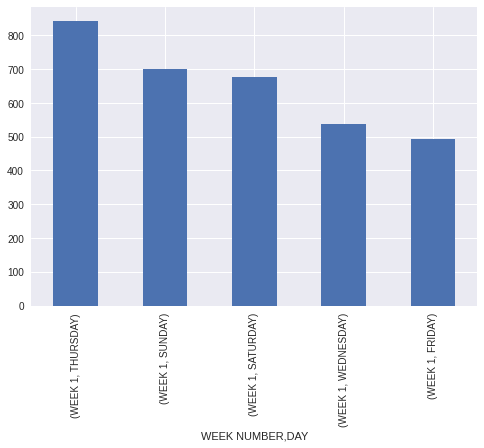

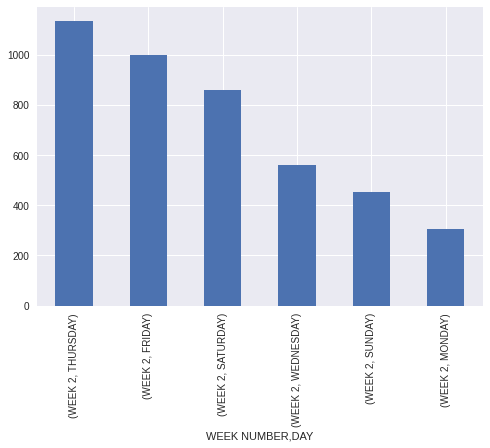

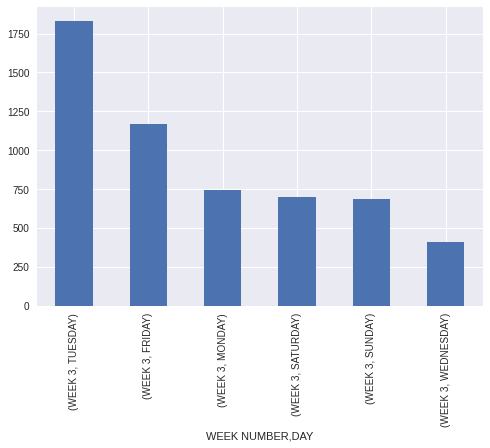

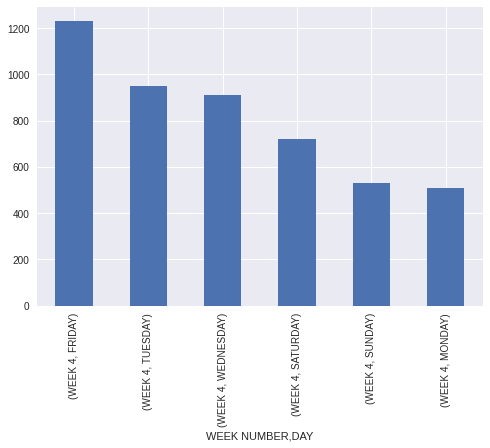

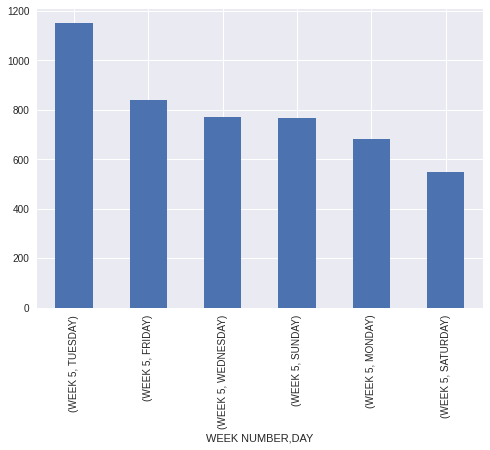

In [67]:
weeks = ['WEEK 1', 'WEEK 2','WEEK 3','WEEK 4','WEEK 5']
for week in weeks:
    data[data['WEEK NUMBER'] == week].groupby(['WEEK NUMBER', 'DAY'])['TOTAL'].sum().sort_values(ascending = False).plot(kind = 'bar')
    plt.show()

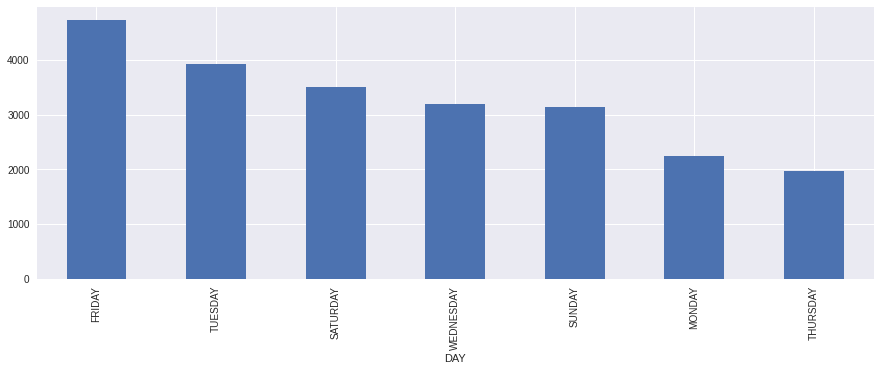

In [43]:
# Profitable day
data.groupby(['DAY'])['TOTAL'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize = (15,5))
plt.show()

In [30]:
data.columns

Index(['Order_ID', 'TAKEAWAY/SEATING/PICKUP', 'DATE', 'DAY', 'TIME', 'SERVER',
       'ITEM', 'QUANTITY', 'PRICE', 'TOTAL', 'ALLERGIES', 'FOOD TYPE',
       'WEEK NUMBER'],
      dtype='object')

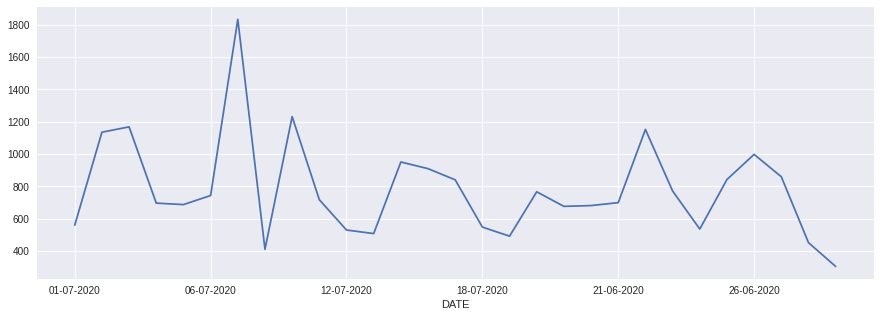

In [46]:
# profitable date
data.groupby(['DATE'])['TOTAL'].sum().plot(kind = 'line', figsize = (15,5))
plt.show()

In [49]:
data.groupby(['WEEK NUMBER', 'DATE', 'DAY'])['TOTAL'].sum().sort_values(ascending = False)

WEEK NUMBER  DATE        DAY      
WEEK 3       07-07-2020  TUESDAY      1832
WEEK 4       10-07-2020  FRIDAY       1231
WEEK 3       03-07-2020  FRIDAY       1168
WEEK 5       21-07-2020  TUESDAY      1152
WEEK 2       02-07-2020  THURSDAY     1135
             26-06-2020  FRIDAY        998
WEEK 4       14-07-2020  TUESDAY       951
             15-07-2020  WEDNESDAY     910
WEEK 2       27-06-2020  SATURDAY      860
WEEK 1       25-06-2020  THURSDAY      843
WEEK 5       17-07-2020  FRIDAY        841
             22-07-2020  WEDNESDAY     772
             19-07-2020  SUNDAY        767
WEEK 3       06-07-2020  MONDAY        744
WEEK 4       11-07-2020  SATURDAY      718
WEEK 1       21-06-2020  SUNDAY        700
WEEK 3       04-07-2020  SATURDAY      697
             05-07-2020  SUNDAY        688
WEEK 5       20-07-2020  MONDAY        682
WEEK 1       20-06-2020  SATURDAY      677
WEEK 2       01-07-2020  WEDNESDAY     561
WEEK 5       18-07-2020  SATURDAY      549
WEEK 1       24-06-

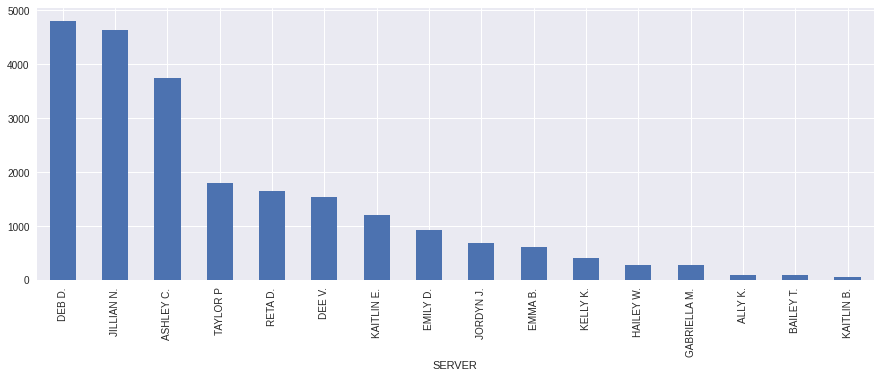

In [73]:
# most engaged server
data.groupby(['SERVER'])['TOTAL'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize = (15,5))
plt.show()

In [71]:
print(data['DATE'].max())
print(data['DATE'].min())

29-06-2020
01-07-2020


In [77]:
data.groupby(['Order_ID'])['TOTAL'].sum().sort_values(ascending = False)[:10]

Order_ID
141281    148
140861    131
139373    128
146042    123
140529    119
143038    116
144128    116
143017    108
146101    103
142986    101
Name: TOTAL, dtype: int64

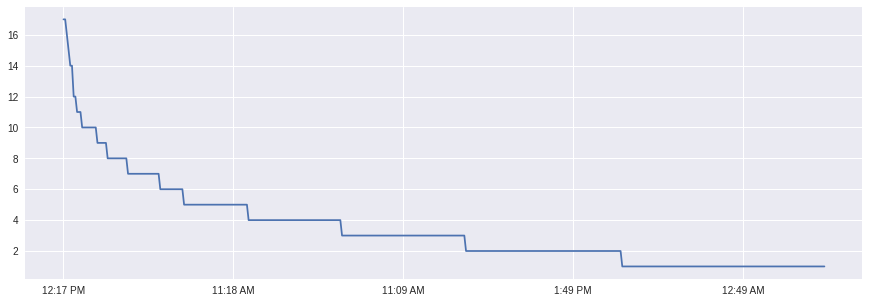

In [83]:
# busiest time in a month..
data['TIME'].value_counts().plot(kind = 'line', figsize = (15,5))
plt.show()

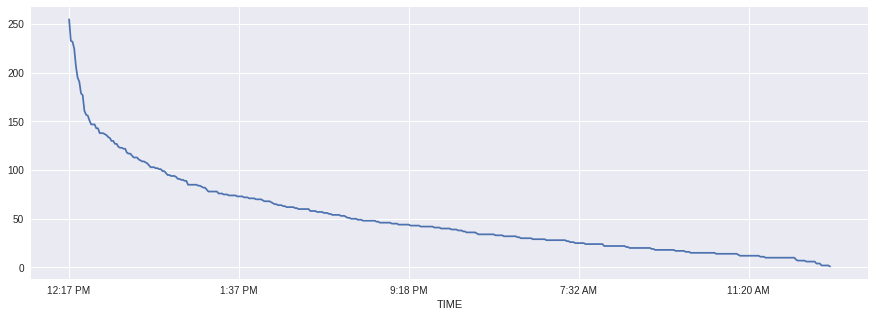

In [86]:
# most valuable time
data.groupby('TIME')['TOTAL'].sum().sort_values(ascending = False).plot(kind = 'line', figsize = (15,5))
plt.show()